In [757]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn 

In [758]:
url = "https://media.githubusercontent.com/media/arteboss/ml_course/main/netflix-rotten-tomatoes-metacritic-imdb.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(15480, 29)

In [759]:
data_raw["Boxoffice"] = data_raw["Boxoffice"].apply(lambda v: float(str(v).replace(",", "").replace("$", "")))

In [760]:
data_raw["huge_boxoffice"] = np.where(data_raw["Boxoffice"] >= 4e+07, 1, 0)

In [761]:
data_raw.drop(['Image', 'Poster', 'TMDb Trailer', 'Trailer Site', 'IMDb Link', 'Netflix Link', 'Summary'], axis=1, inplace=True)

In [762]:
data_raw.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,IMDb Votes,huge_boxoffice
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,98.0,82.0,74.0,57.0,2122065.0,12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",205926.0,0
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,79.0,69.0,1.0,NaN,70632.0,08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",2838.0,0
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,NaN,46.0,NaN,NaN,16263.0,28 Aug 2020,2021-03-04,NaN,1720.0,0
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,01 Oct 2016,2021-03-04,NaN,1147.0,0
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,NaN,NaN,NaN,4.0,NaN,22 Sep 2011,2021-03-04,NaN,63.0,0


In [763]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [764]:
data_raw['Series or Movie'] = data_raw['Series or Movie'].astype('category')
data_raw['Runtime'] = data_raw['Runtime'].astype('category')

In [765]:
data_raw['Series or Movie'].dtype

CategoricalDtype(categories=['Movie', 'Series'], ordered=False)

In [766]:
data_raw['Runtime'].dtype

CategoricalDtype(categories=['1-2 hour', '30-60 mins', '< 30 minutes', '> 2 hrs'], ordered=False)

In [767]:
data_raw.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes,huge_boxoffice
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,4.007000e+03,1.337900e+04,15480.000000
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.568229e+07,4.272841e+04,0.090698
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,7.097634e+07,1.257012e+05,0.287188
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,7.200000e+01,5.000000e+00,0.000000
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,7.816345e+05,4.035000e+02,0.000000
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,1.955107e+07,2.322000e+03,0.000000
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,5.969536e+07,2.089050e+04,0.000000
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,6.593639e+08,2.354197e+06,1.000000


In [768]:
corr_mat = data_raw.corr()
corr_mat

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes,huge_boxoffice
Hidden Gem Score,1.000000,0.120373,0.397905,0.521470,-0.112787,-0.159500,-0.211815,-0.359540,-0.437633
IMDb Score,0.120373,1.000000,0.710922,0.717715,0.291142,0.289843,0.138257,0.229760,0.054761
Rotten Tomatoes Score,0.397905,0.710922,1.000000,0.903345,0.301380,0.309572,0.053706,0.181762,-0.002739
Metacritic Score,0.521470,0.717715,0.903345,1.000000,0.431420,0.449726,0.061548,0.261384,0.009255
Awards Received,-0.112787,0.291142,0.301380,0.431420,1.000000,0.817262,0.193976,0.469818,0.176646
Awards Nominated For,-0.159500,0.289843,0.309572,0.449726,0.817262,1.000000,0.284885,0.497690,0.226649
Boxoffice,-0.211815,0.138257,0.053706,0.061548,0.193976,0.284885,1.000000,0.630301,0.690545
IMDb Votes,-0.359540,0.229760,0.181762,0.261384,0.469818,0.497690,0.630301,1.000000,0.560818
huge_boxoffice,-0.437633,0.054761,-0.002739,0.009255,0.176646,0.226649,0.690545,0.560818,1.000000


No handles with labels found to put in legend.


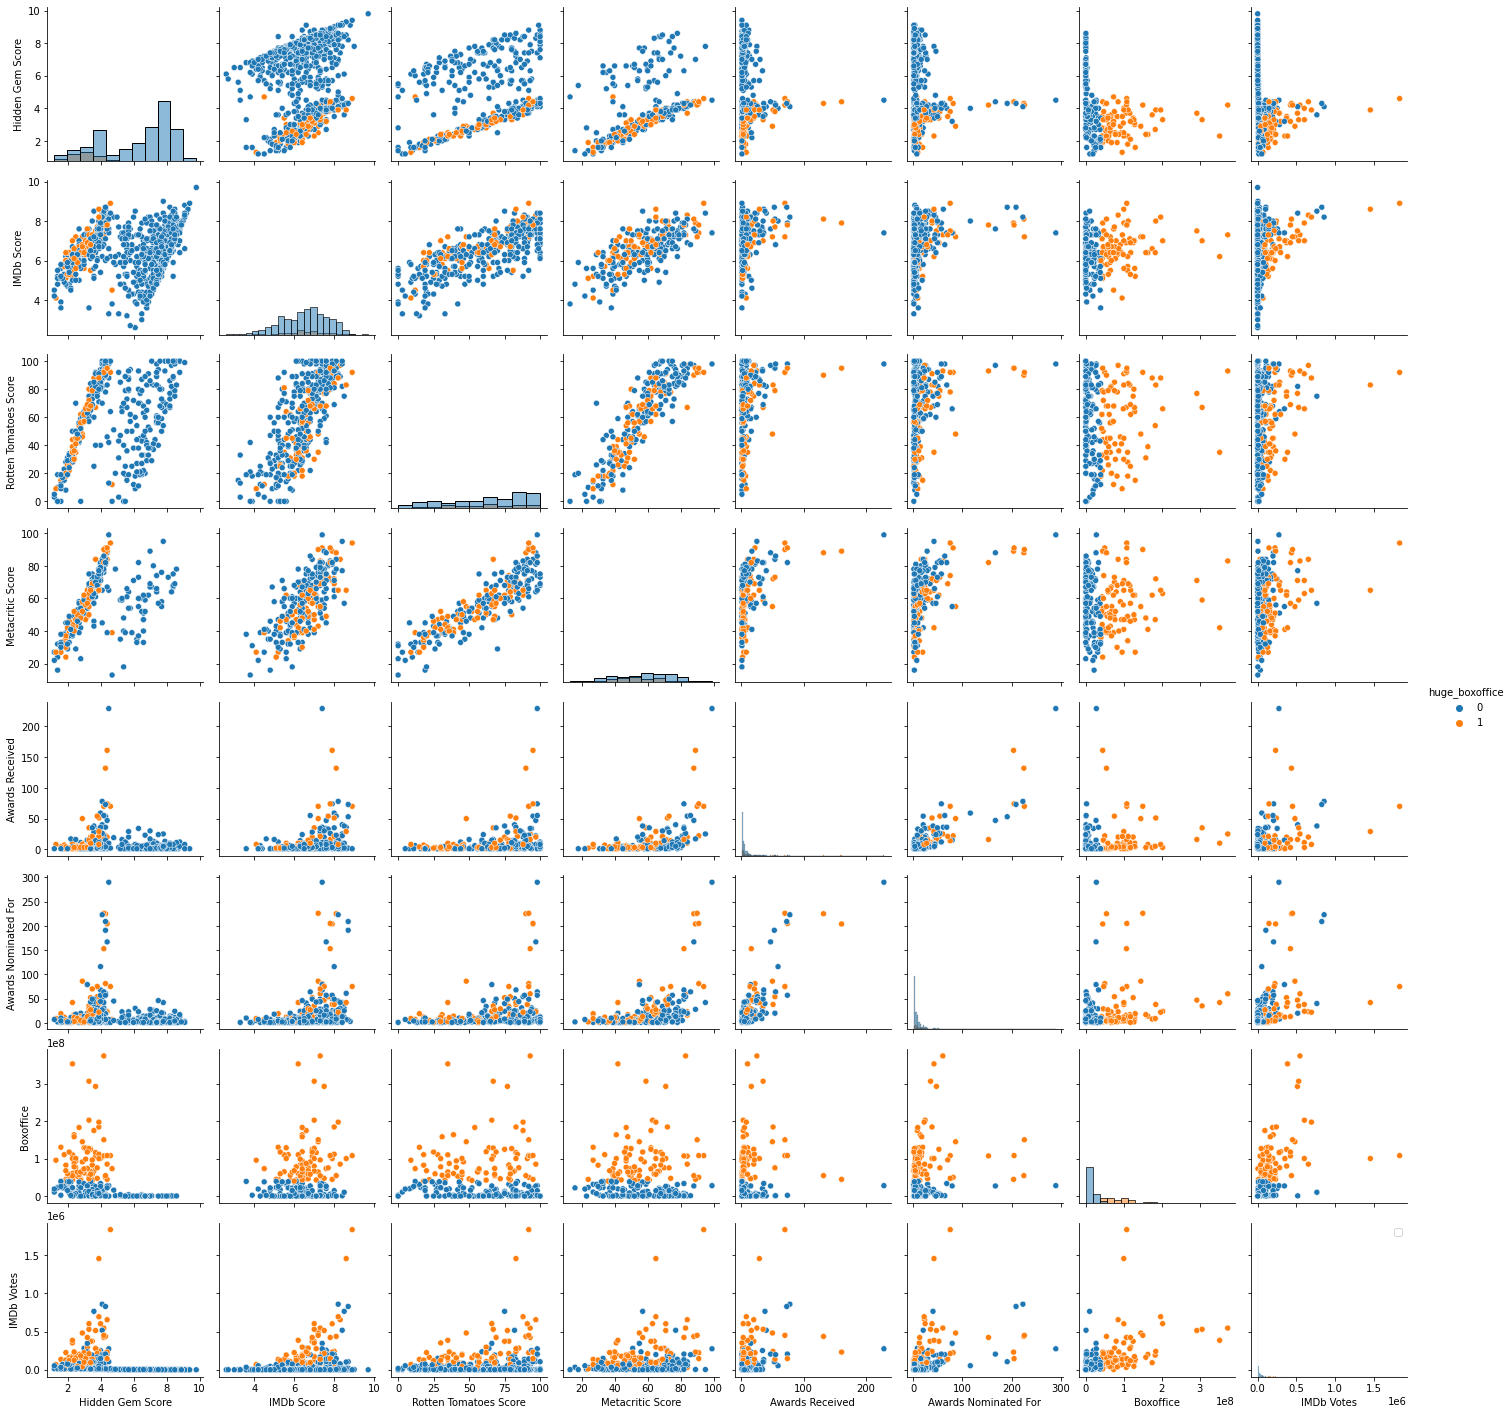

In [769]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue = 'huge_boxoffice', diag_kind='hist')
plt.legend()
pass

In [770]:
data_raw.isna().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
IMDb Votes                2101
huge_boxoffice               0
dtype: int64

In [771]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

C:\Users\328F~1\AppData\Local\Temp/ipykernel_3588/3749499989.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)


In [772]:
data_raw.isna().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score             0
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                   0
Rotten Tomatoes Score        0
Metacritic Score             0
Awards Received              0
Awards Nominated For         0
Boxoffice                    0
Release Date              2107
Netflix Release Date         0
Production House         10331
IMDb Votes                   0
huge_boxoffice               0
dtype: int64

In [773]:
dummies = data_raw['Genre'].str.join(sep='').str.get_dummies(sep=', ')
dummies_1 = pd.get_dummies(data_raw['Series or Movie'])
dummies_2 = pd.get_dummies(data_raw['Runtime'])

In [774]:
data_raw = pd.concat((data_raw, dummies), axis=1)
data_raw = pd.concat((data_raw, dummies_1), axis=1)
data_raw = pd.concat((data_raw, dummies_2), axis=1)
data_raw = data_raw.drop(['Genre', 'Series or Movie', 'Runtime'], axis=1)
data_raw.head()

,Title,Tags,Languages,Hidden Gem Score,Country Availability,Director,Writer,Actors,View Rating,IMDb Score,...,Talk-Show,Thriller,War,Western,Movie,Series,1-2 hour,30-60 mins,< 30 minutes,> 2 hrs
0,Lets Fight Ghost,"Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",4.3,Thailand,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,...,0,0,0,0,0,1,0,0,1,0
1,HOW TO BUILD A GIRL,"Dramas,Comedies,Films Based on Books,British",English,7.0,Canada,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,...,0,0,0,0,1,0,1,0,0,0
2,Centigrade,Thrillers,English,6.4,Canada,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,...,0,1,0,0,1,0,1,0,0,0
3,ANNE+,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,7.7,"Belgium,Netherlands",NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,...,0,0,0,0,0,1,0,0,1,0
4,Moxie,"Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,...,0,0,0,0,1,0,1,0,0,0


In [775]:
data_stand = (data_raw - data_raw.mean(axis = 0))/data_raw.std(axis = 0)
data_stand.describe()

C:\Users\328F~1\AppData\Local\Temp/ipykernel_3588/869544523.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_stand = (data_raw - data_raw.mean(axis = 0))/data_raw.std(axis = 0)


,1-2 hour,30-60 mins,< 30 minutes,> 2 hrs,Action,Adult,Adventure,Animation,Awards Nominated For,Awards Received,...,Rotten Tomatoes Score,Sci-Fi,Series,Short,Sport,Talk-Show,Thriller,War,Western,huge_boxoffice
count,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,15480.000000,1.548000e+04,...,1.548000e+04,15480.000000,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04
mean,-9.180139e-17,-5.508083e-18,-1.468822e-17,3.672055e-17,-7.344111e-17,3.672055e-18,7.344111e-18,5.140878e-17,0.000000,-2.203233e-17,...,-1.982910e-16,0.000000,-4.957275e-17,9.180139e-18,1.285219e-17,-1.377021e-17,5.140878e-17,-3.672055e-17,2.295035e-17,-5.875289e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,...,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.197603e+00,-1.484945e-01,-5.898643e-01,-3.882635e-01,-4.709240e-01,-3.114273e-02,-3.637518e-01,-3.471504e-01,-0.393676,-3.608732e-01,...,-3.556853e+00,-0.290400,-5.686786e-01,-1.674012e-01,-1.558273e-01,-4.101589e-02,-4.636393e-01,-1.475831e-01,-8.420699e-02,-3.158129e-01
25%,-1.197603e+00,-1.484945e-01,-5.898643e-01,-3.882635e-01,-4.709240e-01,-3.114273e-02,-3.637518e-01,-3.471504e-01,-0.207226,-1.915370e-01,...,1.056245e-01,-0.290400,-5.686786e-01,-1.674012e-01,-1.558273e-01,-4.101589e-02,-4.636393e-01,-1.475831e-01,-8.420699e-02,-3.158129e-01
50%,8.349475e-01,-1.484945e-01,-5.898643e-01,-3.882635e-01,-4.709240e-01,-3.114273e-02,-3.637518e-01,-3.471504e-01,-0.207226,-1.915370e-01,...,1.056245e-01,-0.290400,-5.686786e-01,-1.674012e-01,-1.558273e-01,-4.101589e-02,-4.636393e-01,-1.475831e-01,-8.420699e-02,-3.158129e-01
75%,8.349475e-01,-1.484945e-01,1.695196e+00,-3.882635e-01,-4.709240e-01,-3.114273e-02,-3.637518e-01,-3.471504e-01,-0.207226,-1.915370e-01,...,1.056245e-01,-0.290400,-5.686786e-01,-1.674012e-01,-1.558273e-01,-4.101589e-02,-4.636393e-01,-1.475831e-01,-8.420699e-02,-3.158129e-01
max,8.349475e-01,6.733823e+00,1.695196e+00,2.575404e+00,2.123348e+00,3.210815e+01,2.748950e+00,2.880410e+00,17.552094,2.495489e+01,...,2.165768e+00,3.443309,1.758349e+00,5.973287e+00,6.416944e+00,2.437922e+01,2.156710e+00,6.775406e+00,1.187473e+01,3.166227e+00


In [776]:
data_raw.columns

Index(['Title', 'Tags', 'Languages', 'Hidden Gem Score',
       'Country Availability', 'Director', 'Writer', 'Actors', 'View Rating',
       'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score',
       'Awards Received', 'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'IMDb Votes',
       'huge_boxoffice', 'Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', 'Movie',
       'Series', '1-2 hour', '30-60 mins', '< 30 minutes', '> 2 hrs'],
      dtype='object')

In [777]:
X = data_stand.drop (['Title', 'Tags', 'Languages',
       'Country Availability', 'Director', 'Writer', 'Actors', 'View Rating',
       'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House',
       'huge_boxoffice'], axis=1) 
y = data_raw['huge_boxoffice']

In [778]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(11610, 3870)

In [779]:
from sklearn.neighbors import KNeighborsClassifier

knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
knn_training_predict = 100 * knn_default.score(X_train, y_train)
knn_test_predict = 100 * knn_default.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

C:\Users\Артем\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Артем\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy. Train : 95.37%, Test: 93.15%. 


In [780]:
knn_10 = KNeighborsClassifier(n_neighbors = 10)
knn_10.fit(X_train, y_train)
knn_training_predict = 100 * knn_10.score(X_train, y_train)
knn_test_predict = 100 * knn_10.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

C:\Users\Артем\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Артем\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy. Train : 94.23%, Test: 93.51%. 


In [781]:
knn_8 = KNeighborsClassifier(n_neighbors = 7)
knn_8.fit(X_train, y_train)
knn_training_predict = 100 * knn_8.score(X_train, y_train)
knn_test_predict = 100 * knn_8.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

C:\Users\Артем\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Артем\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy. Train : 94.88%, Test: 93.39%. 
